# EDA

Посмотрим на сырые данные

In [1]:
import pandas as pd
df = pd.read_csv('./data1.csv')
df.head(10)

,time,domain,sum(requests)
0,2021-03-22 12:04:00,814.0,278
1,2021-03-22 14:01:00,238.0,392
2,2021-03-22 12:11:30,314.0,2049
3,2021-03-22 13:18:10,826.0,4
4,2021-03-22 12:57:00,381.0,261
5,2021-03-22 11:54:20,22.0,86
6,2021-03-22 13:52:40,165.0,17
7,2021-03-22 12:35:00,53.0,13
8,2021-03-22 12:02:10,644.0,5
9,2021-03-22 12:17:40,346.0,11


Переименуем столбец с запросами для удобства.

Обозначим столбец с временем как индексный.

In [2]:
df = pd.read_csv('./data1.csv', parse_dates=['time'], index_col='time')
df.rename(columns={'sum(requests)': 'requests'}, inplace=True)

In [3]:
df.head()

,domain,requests
time,,
2021-03-22 12:04:00,814.0,278
2021-03-22 14:01:00,238.0,392
2021-03-22 12:11:30,314.0,2049
2021-03-22 13:18:10,826.0,4
2021-03-22 12:57:00,381.0,261


In [4]:
df.columns

Index(['domain', 'requests'], dtype='object')

In [5]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 696668 entries, 2021-03-22 12:04:00 to 2021-03-22 13:13:30
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   domain    696668 non-null  float64
 1   requests  696668 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 15.9 MB


Отсортируем по времени

In [6]:
df.sort_index(inplace=True)

In [7]:
print('Минимальный индекс')
df.index.min()

Минимальный индекс


Timestamp('2021-03-22 11:39:20')

In [8]:
print('Максимальный индекс')
df.index.max()

Максимальный индекс


Timestamp('2021-03-22 14:11:40')

In [9]:
df.index.dtype

dtype('<M8[ns]')

In [10]:
df.index

DatetimeIndex(['2021-03-22 11:39:20', '2021-03-22 11:39:20',
               '2021-03-22 11:39:20', '2021-03-22 11:39:20',
               '2021-03-22 11:39:20', '2021-03-22 11:39:20',
               '2021-03-22 11:39:20', '2021-03-22 11:39:20',
               '2021-03-22 11:39:20', '2021-03-22 11:39:20',
               ...
               '2021-03-22 14:11:40', '2021-03-22 14:11:40',
               '2021-03-22 14:11:40', '2021-03-22 14:11:40',
               '2021-03-22 14:11:40', '2021-03-22 14:11:40',
               '2021-03-22 14:11:40', '2021-03-22 14:11:40',
               '2021-03-22 14:11:40', '2021-03-22 14:11:40'],
              dtype='datetime64[ns]', name='time', length=696668, freq=None)

TODO: Что можно сказать про индекс? Минимальный, максимальный, шаг?

__Индекс представляет из себя '<M8[ns]', что является типом временных рядов.
Минимальный и максимальные элементы индекса показаны выше__

__Домен с наиболшим количеством запросов во всем датафрейме__

In [11]:
df.groupby('domain').sum().sort_values(by='requests', ascending=False)

,requests
domain,
673.0,13000497
323.0,10231659
811.0,8254468
734.0,5442771
8.0,4184930
...,...
692.0,2
309.0,2
753.0,2


__Промежуток времени, в который наблюдалось наиболшее количество запросов__

In [12]:
df.reset_index().groupby(['time', 'domain']).sum().sort_values(by='requests', ascending=False).head(3)

,,requests
time,domain,
2021-03-22 12:29:40,673.0,15558
2021-03-22 11:53:30,673.0,15457
2021-03-22 12:09:40,673.0,15375


__Зафиксирпум один домен__

In [13]:
DOMAIN = 673.0

df1 = df.query(f"domain == '{DOMAIN}'")
df2 = df[df.domain == DOMAIN]
df3 = df.loc[df['domain'] == DOMAIN]

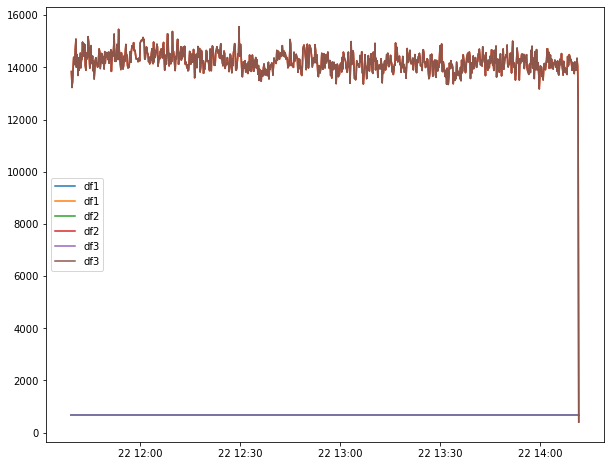

In [14]:
import matplotlib.pyplot as plt

fig = plt.subplots(figsize=(10, 8))
plt.plot(df1, label = 'df1')
plt.plot(df2, label = 'df2')
plt.plot(df3, label = 'df3')
plt.legend()

TODO: определить равны ли полученные отображения

__Изображения полностью наложились друг на друга__

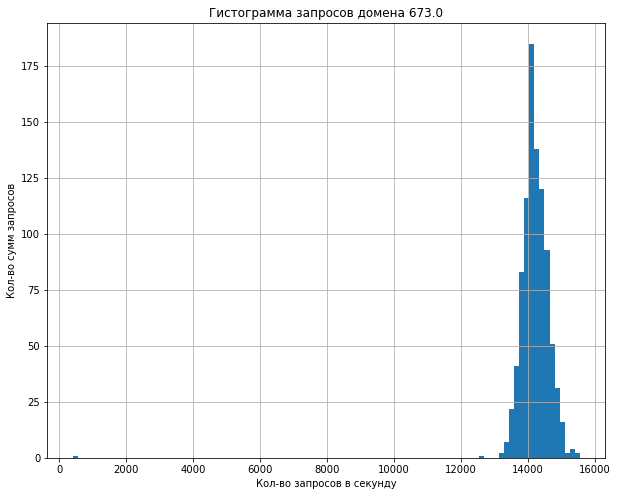

In [15]:
data = df[df.domain == DOMAIN]

fig = plt.subplots(figsize=(10, 8))

plt.hist(data.requests, bins=100)
plt.title(f"Гистограмма запросов домена {DOMAIN}")
plt.xlabel('Кол-во запросов в секунду')
plt.ylabel('Кол-во сумм запросов')
plt.grid()
plt.show()

По этой гистограмме мы можем узнать какое в среднем количество запросов в секунду было у данного домена

Выведем 5 самых популярных доменов

In [16]:
top5 = df.groupby('domain') \
         .sum() \
         .sort_values(by='requests', ascending=False) \
         .head(5) \
         .index \
         .tolist() 
top5

[673.0, 323.0, 811.0, 734.0, 8.0]

# Графики топ 5 сайтов

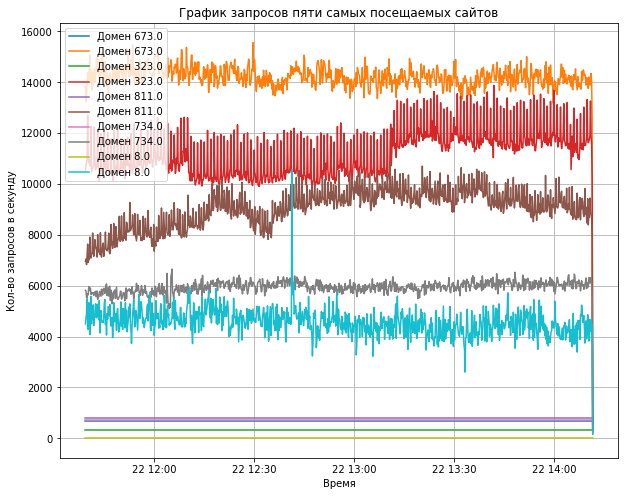

In [17]:
fig = plt.subplots(figsize=(10, 8))
for i in top5:
    T5 = df.query(f"domain == '{i}'")
    plt.plot(T5, label = f'Домен {i}')
plt.title('График запросов пяти самых посещаемых сайтов')
plt.xlabel('Время')
plt.ylabel('Кол-во запросов в секунду')
plt.grid()
plt.legend()
plt.show()

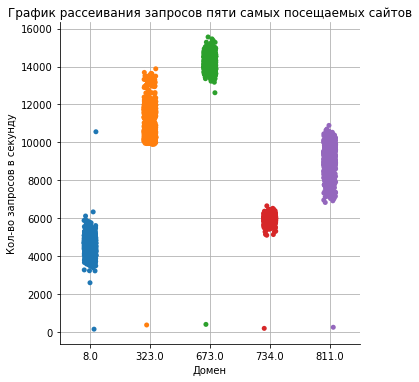

In [18]:
import seaborn as sns
df4 = df[df.domain.isin(top5)].sort_values(by='requests', ascending=False).reset_index()
sns.catplot(x="domain", y="requests", data=df4)
plt.title('График рассеивания запросов пяти самых посещаемых сайтов')
plt.xlabel('Домен')
plt.ylabel('Кол-во запросов в секунду')
plt.grid()
plt.show()

Простое представление данных в виде столбчатой диаграммы

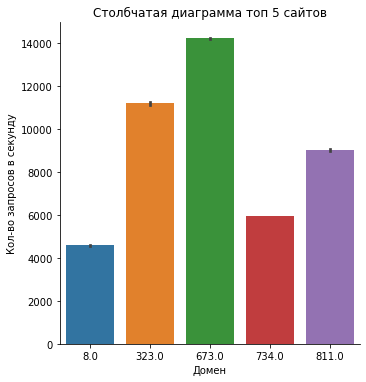

In [19]:
sns.catplot(x="domain", y="requests", kind = 'bar', data=df4)
plt.title('Столбчатая диаграмма топ 5 сайтов')
plt.xlabel('Домен')
plt.ylabel('Кол-во запросов в секунду')
plt.show()

Представление распределения данных в виде коробок.

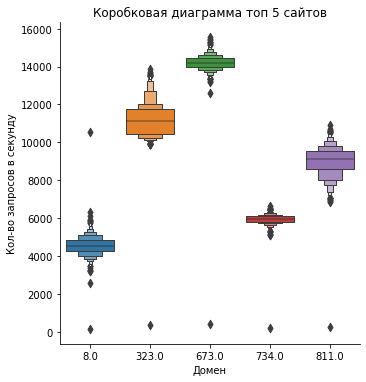

In [20]:
sns.catplot(x="domain", y="requests", kind = 'boxen', data=df4)
plt.title('Коробковая диаграмма топ 5 сайтов')
plt.xlabel('Домен')
plt.ylabel('Кол-во запросов в секунду')
plt.show()

No handles with labels found to put in legend.


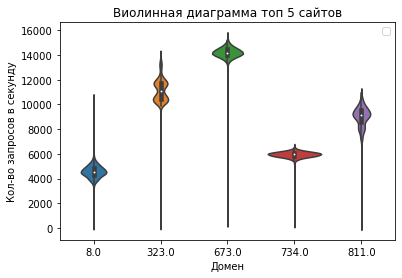

In [21]:
sns.violinplot(x="domain", y="requests", data=df4)
plt.title('Виолинная диаграмма топ 5 сайтов')
plt.xlabel('Домен')
plt.ylabel('Кол-во запросов в секунду')
plt.show()

TODO: что это такое?

__Это ещё один вид представления данных. Как и в случае с коробковым представлением здесь представлено количество запросов у пяти самых популярных доменов. Также имеется медиана (белая точка) и распределение количества запросов в разное время. Например, у домена 8 были максимальные запросы более 10 тысяч, однако в среднем запросы колеблются от 4 до 6 тысяч.__